<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/0.0.2/kuba_img_manip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


In [4]:
!apt-get install poppler-utils 
!apt-get install tesseract-ocr-pol
!apt-get install libleptonica-dev 
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-dev
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 60 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (309 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-en

In [5]:
pip install pdf2image

In [6]:
pip install pytesseract 

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=107d4ed4b6a4208c716d2529a9c38e1bb186d4642981fe462806d9aac965fb67
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [7]:
pip install autocorrect

     |████████████████████████████████| 624kB 4.3MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp37-none-any.whl size=621587 sha256=991e4b6f7a287c9bc0459e081f926dcd1f5cb313995700fa95887dcf59455df9
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect


In [8]:
from PIL import Image 
import pytesseract 
import sys 
from pdf2image import convert_from_path 
import os
import pandas as pd
import cv2 
from pdf2image import pdfinfo_from_path,convert_from_path
import os
from PIL import Image
from pytesseract import image_to_string
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from autocorrect import Speller
from matplotlib.pyplot import figure


In [9]:
spell = Speller('pl')

dictionary for this language not found, downloading...
__________________________________________________
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
done!


In [10]:
def fig_prepare(file):
  image = cv2.imread(file)
  kernel_3x3 = np.ones((3, 3), np.float32) / 9

  kernel_sharpening = np.array([[-1,-1,-1], 
                                [-1, 9,-1],
                                [-1,-1,-1]])

  blurred = cv2.filter2D(image, -1, kernel_3x3)
  sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

  blurred = cv2.filter2D(sharpened, -1, kernel_3x3)
  sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

  lower=np.array([0,0,0])
  upper=np.array([100,100,100])

  mask = cv2.inRange(sharpened, lower, upper)
  #figure(figsize=(20,20))
  #plt.imshow(255-mask)
  #plt.show()    
  
  return 255-mask

In [11]:
def text_from_file(image):
  image_correct=fig_prepare(image)
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [12]:
def text_from_image(image):
  image_correct=image
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [29]:
import re
def hasNumbers(inputString):
   return any(char.isdigit() for char in inputString)

In [13]:
myText,myDigits=text_from_image('drive/MyDrive/kuba/resolution500/fig1.jpg')

<class 'list'>
cropped number  

mask number PA SG: 630/333

cropped text  

mask text PA SG: 630/333



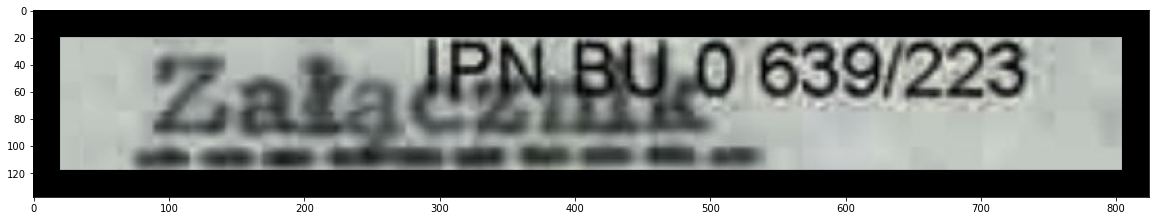

cropped number  

mask number STRUKTURA I WYKONANIE BUDŻETÓW

cropped text  

mask text STRUKTURA I WYKONANIE BUDŻETÓW



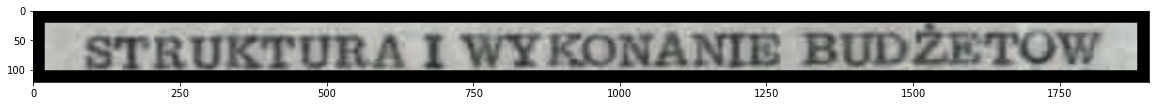

cropped number 
mask number E co notaadandnadandaninadkanikonchaniaabonudie)

cropped text 
mask text E co notaadandnadandaninadkanikonchaniaabonudie)



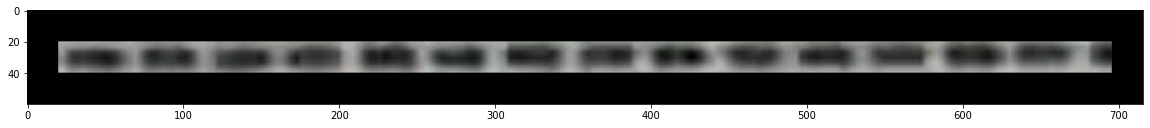

cropped number  

ATOLICKHICH GR

mask number KATOLICKICH ORGANIZACJI SPOŁECZNYCH :

cropped text  

ATOLICKHICH GR

mask text KATOLICKICH ORGANIZACJI SPOŁECZNYCH :



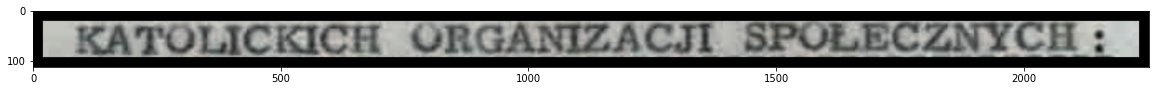

cropped number  

mask number "PAX", ChSS, KIK za rok 1971

cropped text  

mask text "PAX", ChSS, KIK za rok 1971



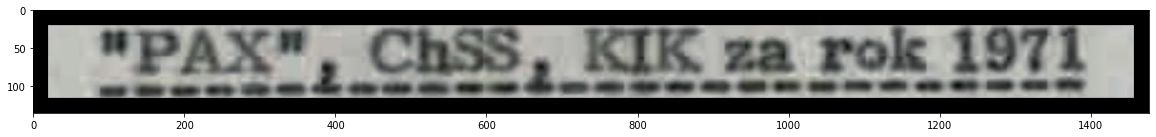

cropped number  

mask number STOWARZYSZENIE "PAX"

cropped text  

mask text STOWARZYSZENIE "PAX"



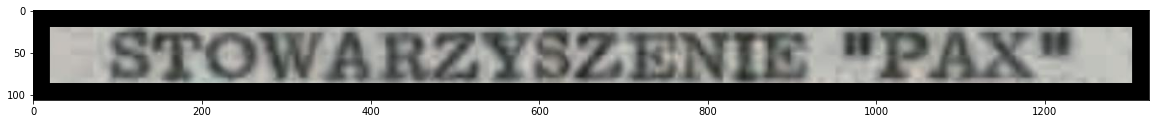

cropped number  

Realizacja budżetuv za rok 1971:

mask number Realizacja budżetu za rok 1971:

cropped text  

Realizacja budżetuv za rok 1971:

mask text Realizacja budżetu za rok 1971:



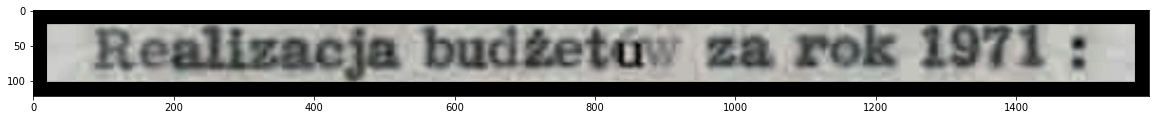

cropped number  

z 36.720, 000,7 ZŁ,

mask number SE TZM" SIĘ

cropped text  

z 36.720, 000,7 ZŁ,

mask text SE TZM" SIĘ



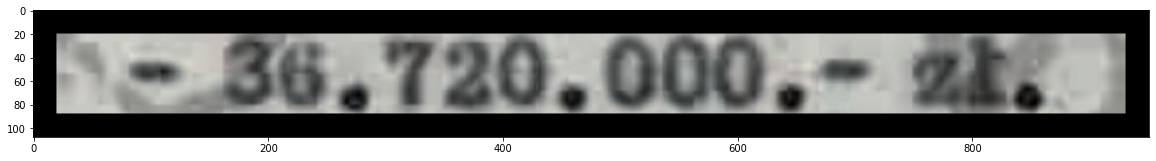

cropped number  

statutowa

mask number - działalność statutowa

cropped text  

statutowa

mask text - działalność statutowa



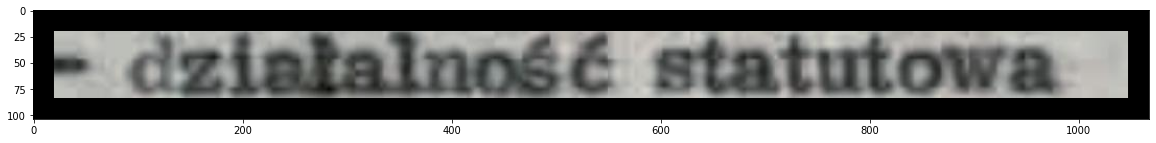

cropped number  

- pokrycie straty prasy i wydawnictw - 26.650,000,” zł,

mask number = pokrycie straty prasy i wydawnictw - 28.680,0060,= zł.

cropped text  

- pokrycie straty prasy i wydawnictw - 26.650,000,” zł,

mask text = pokrycie straty prasy i wydawnictw - 28.680,0060,= zł.



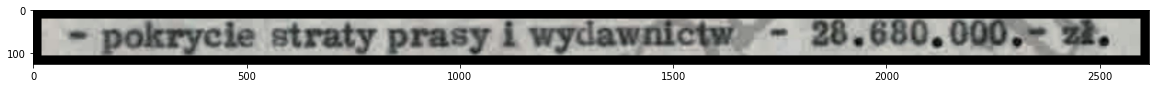

cropped number  

mask number _..raozem; B 65.400.000, : i

cropped text  

mask text _..raozem; B 65.400.000, : i



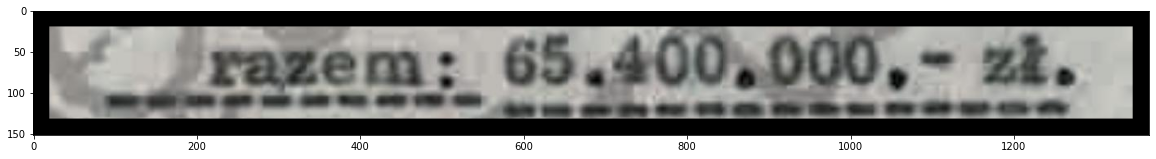

cropped number  

mask number Struktura budżetu :

cropped text  

mask text Struktura budżetu :



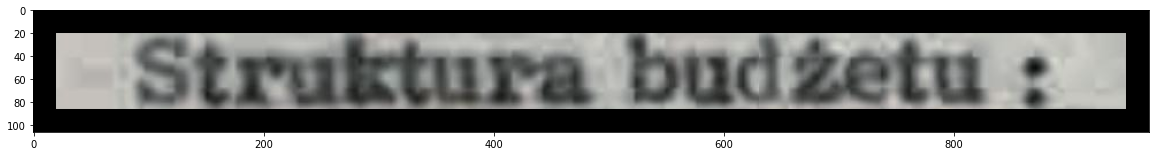

cropped number  

1. Płace / osobowy fundusz płac,

mask number 1. Płace / osobowy fundusz płac,

cropped text  

1. Płace / osobowy fundusz płac,

mask text 1. Płace / osobowy fundusz płac,



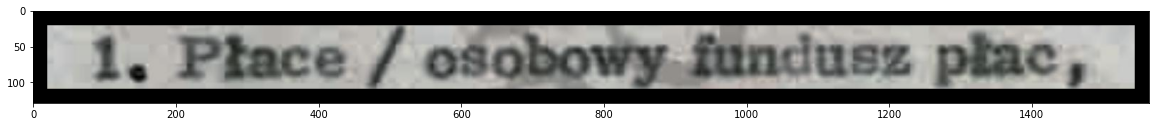

cropped number narzuty, bezosobowy fundusz

 

mask number PT A W I RZE CA

cropped text narzuty, bezosobowy fundusz

 

mask text PT A W I RZE CA



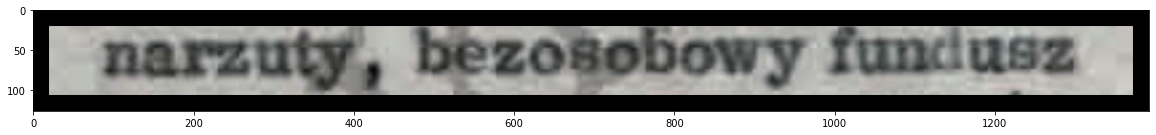

cropped number  

płacę Fundusz honorariów /

mask number płac, Fumdusz honorariów /

cropped text  

płacę Fundusz honorariów /

mask text płac, Fumdusz honorariów /



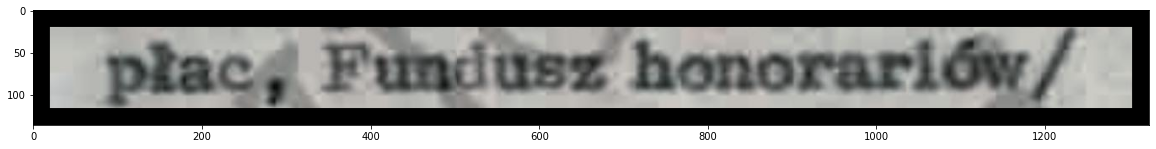

cropped number - 19.305,000,7 zł,

mask number - 19.305,000,7 zł,

cropped text - 19.305,000,7 zł,

mask text - 19.305,000,7 zł,



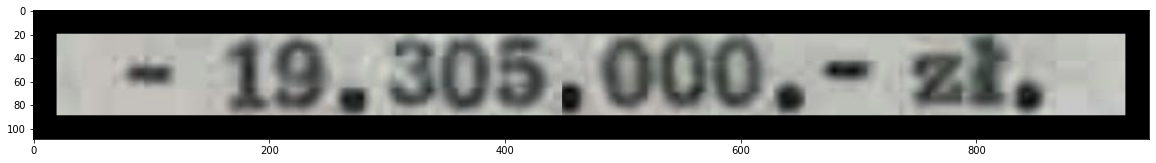

cropped number 275.000.” zł,

mask number 275.000." zł,

cropped text 275.000.” zł,

mask text 275.000." zł,



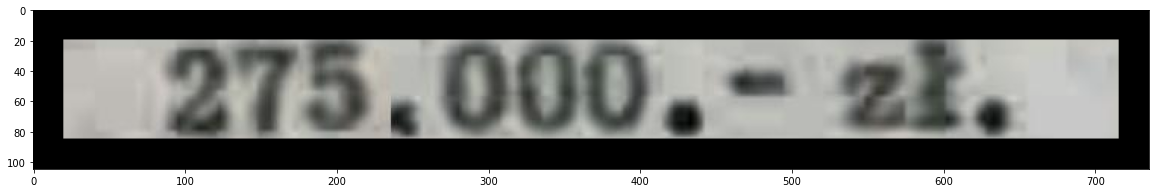

cropped number 2. Fundusz nagród

 

mask number BGN

cropped text 2. Fundusz nagród

 

mask text BGN



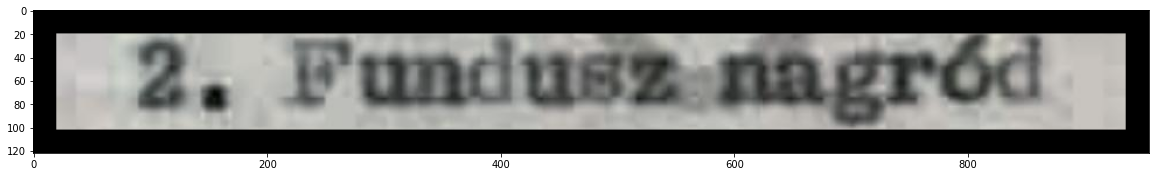

cropped number  

mask number - 2.900.000.*- zł,

cropped text  

mask text - 2.900.000.*- zł,



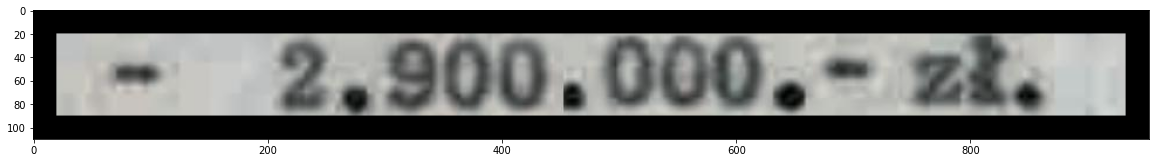

cropped number 3. Podróże służbowe kodeleg

 

mask number 3. Podróże służbowe i delegacje

cropped text 3. Podróże służbowe kodeleg

 

mask text 3. Podróże służbowe i delegacje



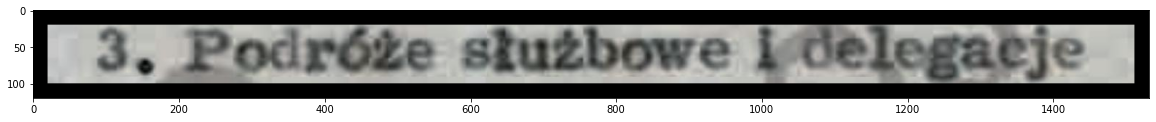

cropped number  

4. Koszty biurowe/ utrzymani:

mask number -4. Koszty biurowe/ utrzyn

 

cropped text  

4. Koszty biurowe/ utrzymani:

mask text -4. Koszty biurowe/ utrzyn

 



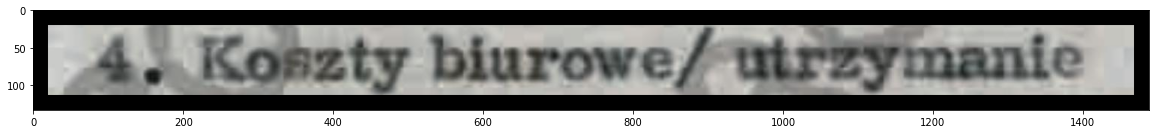

cropped number pomieszczeń, remonty bieżąc”

 

mask number pomieszczeń, remonty bieżąc-

cropped text pomieszczeń, remonty bieżąc”

 

mask text pomieszczeń, remonty bieżąc-



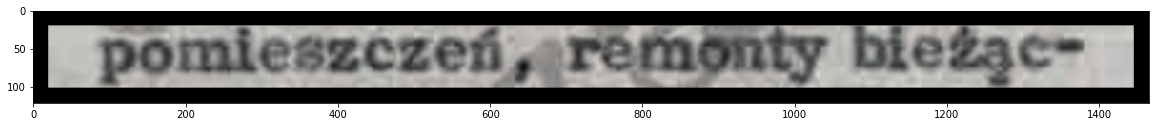

cropped number  

mask number - ce 1 lnnę świadczenia /

cropped text  

mask text - ce 1 lnnę świadczenia /



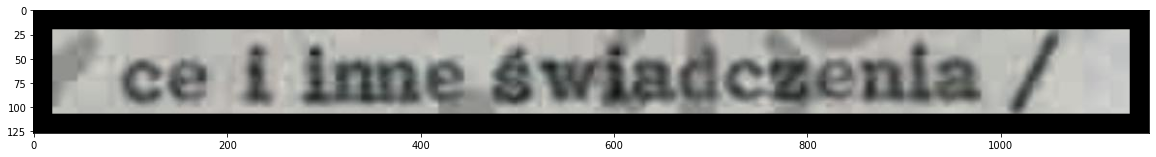

cropped number  

mask number CENA?

cropped text  

mask text CENA?



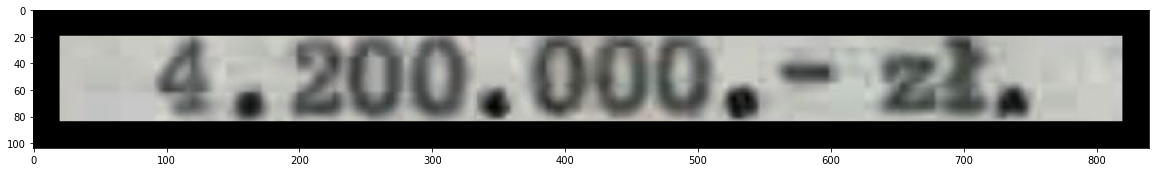

cropped number  

- 1,600.000.,7 zł,

mask number = | a L[ŁI8R LISA i 430

cropped text  

- 1,600.000.,7 zł,

mask text = | a L[ŁI8R LISA i 430



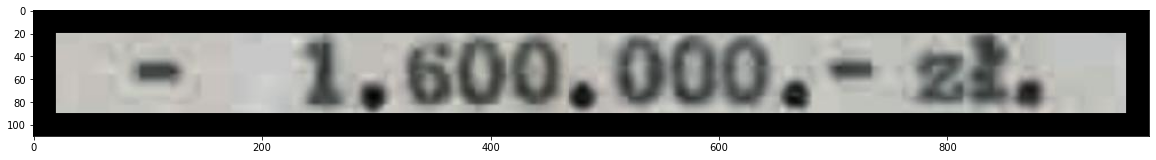

cropped number  

mask number "8. Transport

cropped text  

mask text "8. Transport



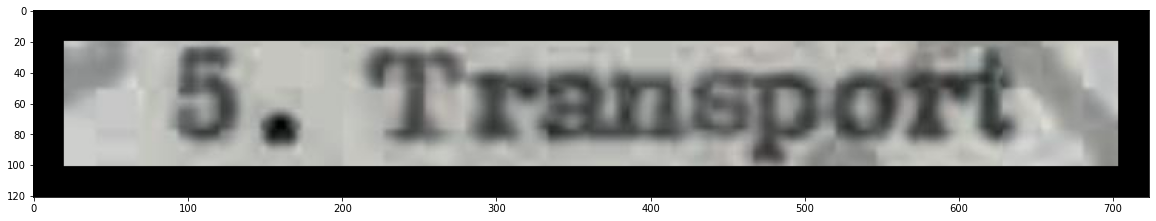

cropped number 150.000.” zł,

mask number 150.000." zł,

cropped text 150.000.” zł,

mask text 150.000." zł,



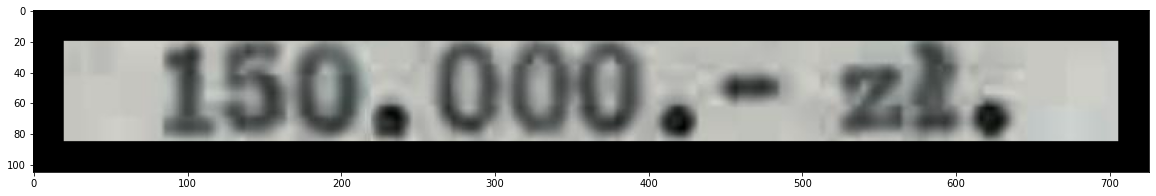

cropped number  

6. Gimnazjum św, Augustyna

mask number 6. Gimaaszjam św, Augustyna

cropped text  

6. Gimnazjum św, Augustyna

mask text 6. Gimaaszjam św, Augustyna



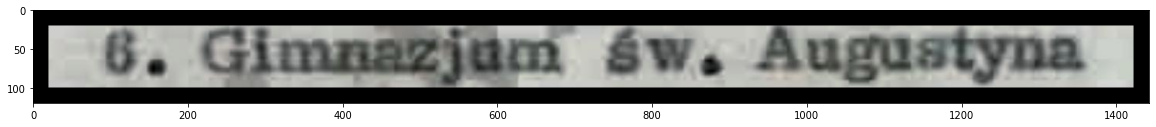

cropped number  

7. Działalność społ.-polityczna

mask number 7. Działalność społ."polityczna

cropped text  

7. Działalność społ.-polityczna

mask text 7. Działalność społ."polityczna



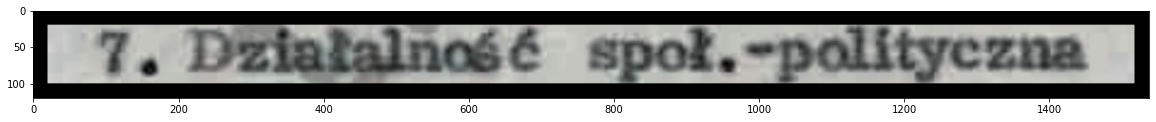

cropped number / komierencje, kursy, zjazdy,

 

mask number  

/ konferencje, kursy, zjazdy,

cropped text / komierencje, kursy, zjazdy,

 

mask text  

/ konferencje, kursy, zjazdy,



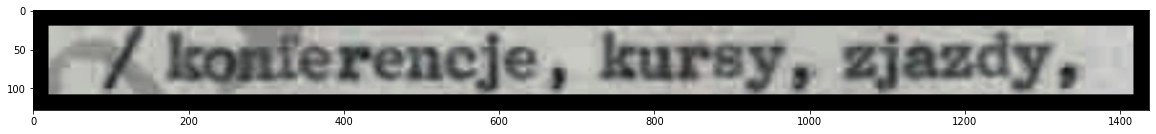

cropped number  

zespoły, akcje, działalność

mask number zespoły, akcje, działalność

cropped text  

zespoły, akcje, działalność

mask text zespoły, akcje, działalność



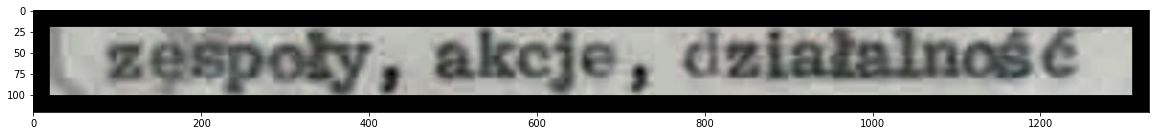

cropped number zagraniczna/

mask number  zagraniczna/

cropped text zagraniczna/

mask text  zagraniczna/



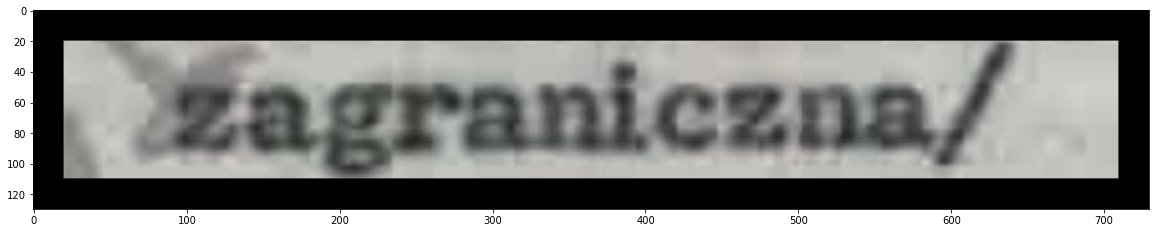

cropped number  

mask number 8.246,000,- zł.

cropped text  

mask text 8.246,000,- zł.



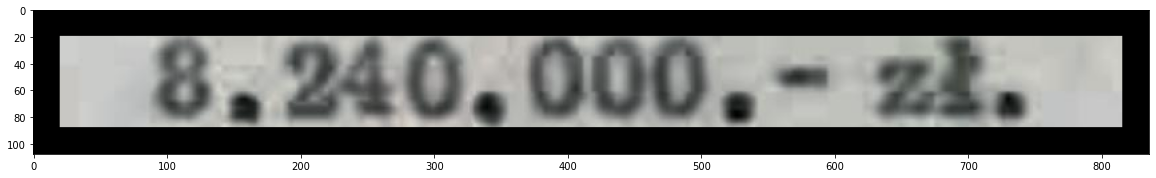

cropped number 6, Pokrycie straty prasy i wyda”

 

mask number 8, Pokrycie straty prasy £ wyda”

cropped text 6, Pokrycie straty prasy i wyda”

 

mask text 8, Pokrycie straty prasy £ wyda”



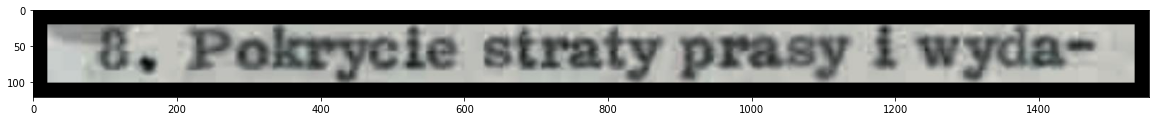

cropped number  

mask number - 28.680,000.- zł.

cropped text  

mask text - 28.680,000.- zł.



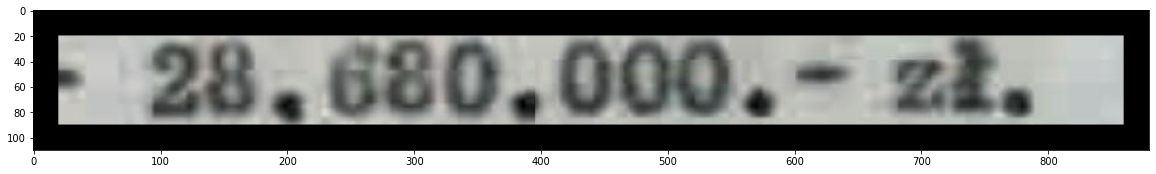

cropped number  

mask number wnictw

cropped text  

mask text wnictw



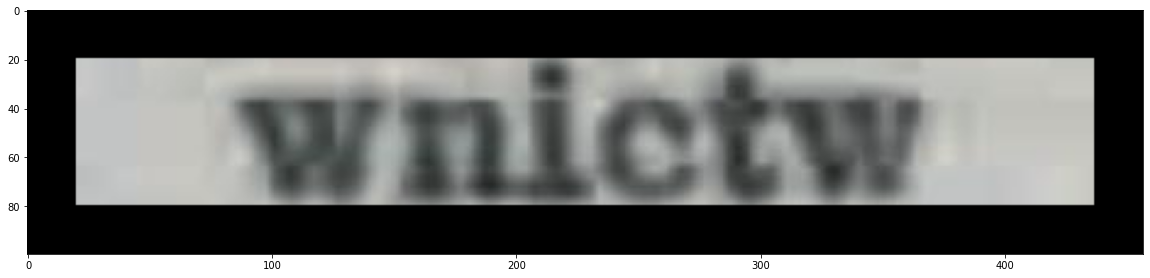

cropped number  

mask number 10) M IWA ng zł,

cropped text  

mask text 10) M IWA ng zł,



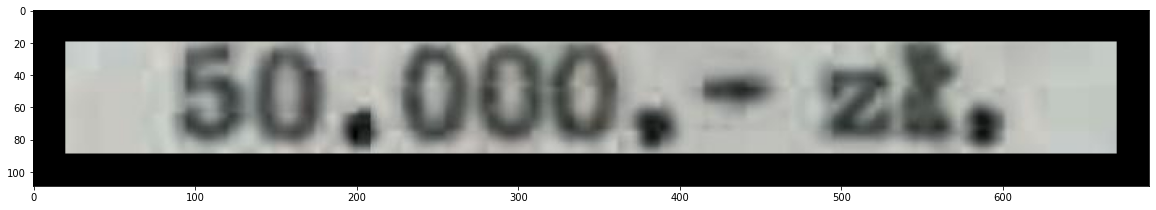

cropped number  

9. Podatki, opłaty

mask number 9. Podatki, opłaty

cropped text  

9. Podatki, opłaty

mask text 9. Podatki, opłaty



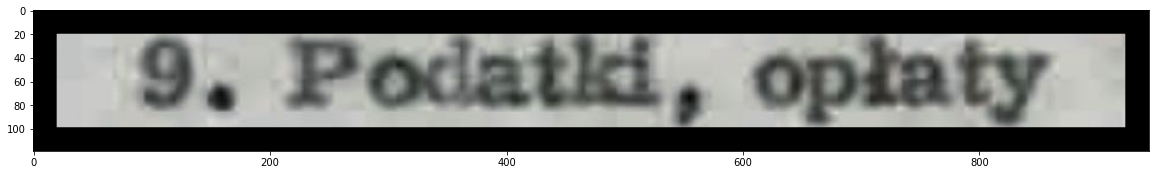

cropped number  

65.400.000,"zŁ.

mask number 65 .400.000."zł.

cropped text  

65.400.000,"zŁ.

mask text 65 .400.000."zł.



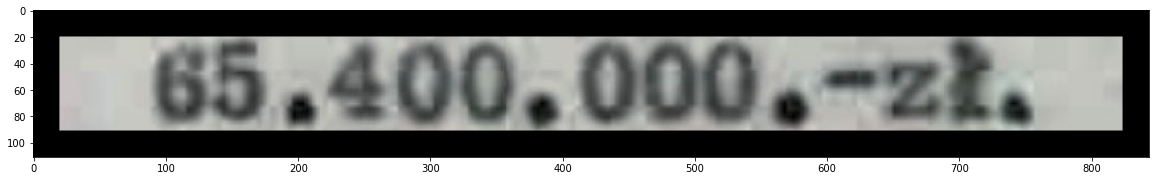

cropped number  

TaZzCl[R

mask number razem.

cropped text  

TaZzCl[R

mask text razem.



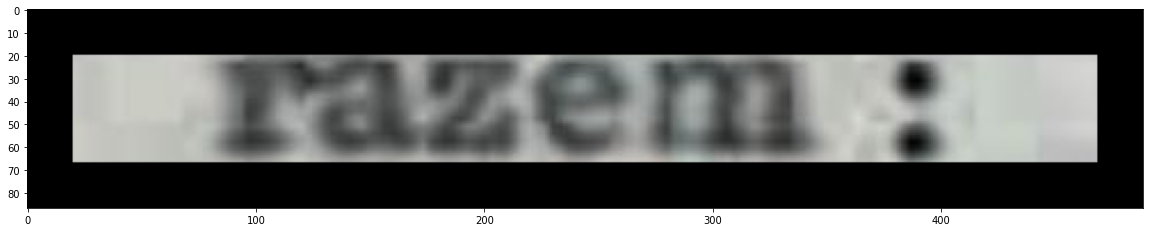

cropped number 
mask number Ea local lidl oils ca odno dalam dn dicazadkon dioondozacia)

cropped text 
mask text Ea local lidl oils ca odno dalam dn dicazadkon dioondozacia)



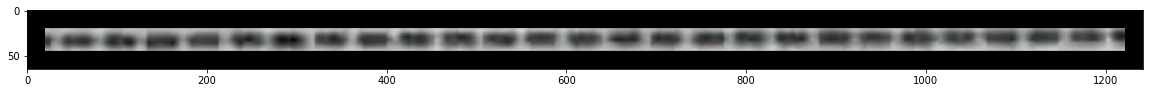

cropped number m; a A TW a W ww ww w

mask number 
cropped text m; a A TW a W ww ww w

mask text 


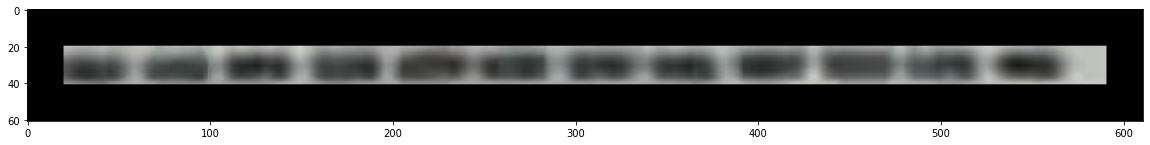

cropped number 
mask number I dbała banalna Ea niłkanai coil cui czadiac cnota czci

cropped text 
mask text I dbała banalna Ea niłkanai coil cui czadiac cnota czci



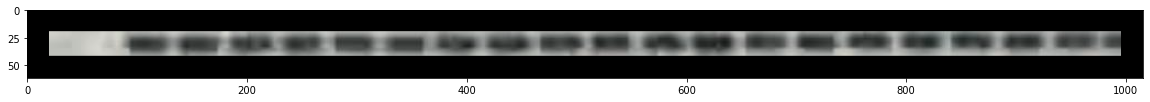

cropped number  

mask number Budżet równoważą :

cropped text  

mask text Budżet równoważą :



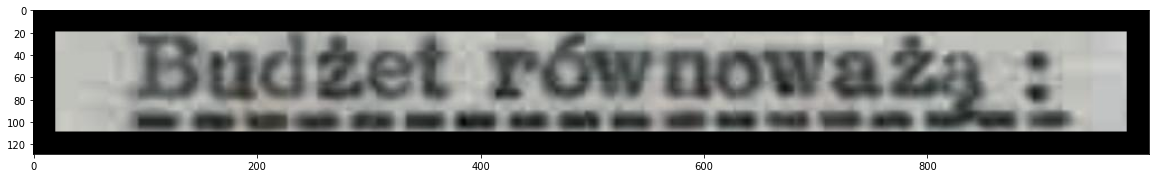

cropped number  

- wpłata z nadwyżki z całokształtu

mask number - wpłata z nadwyżki z całokształtu

cropped text  

- wpłata z nadwyżki z całokształtu

mask text - wpłata z nadwyżki z całokształtu



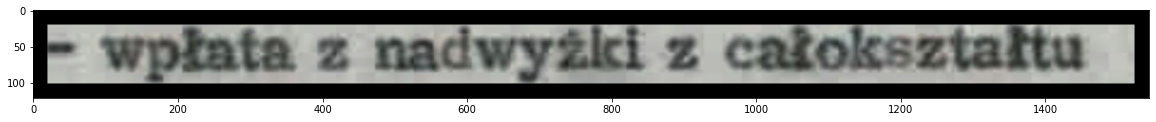

cropped number  

mask number KUCZU NU JE: ©

cropped text  

mask text KUCZU NU JE: ©



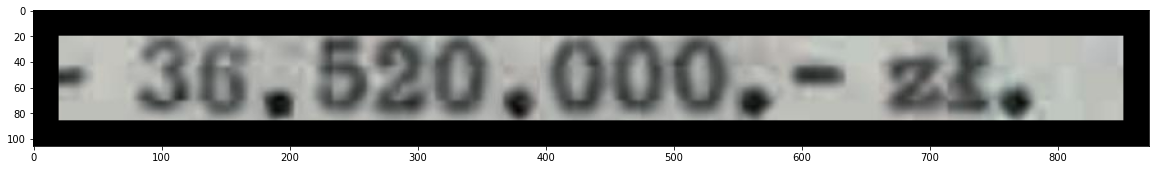

cropped number m g s

 

działalności gospodarczej Z.21

mask number działalności gospodarczej ZŹ2G

cropped text m g s

 

działalności gospodarczej Z.21

mask text działalności gospodarczej ZŹ2G



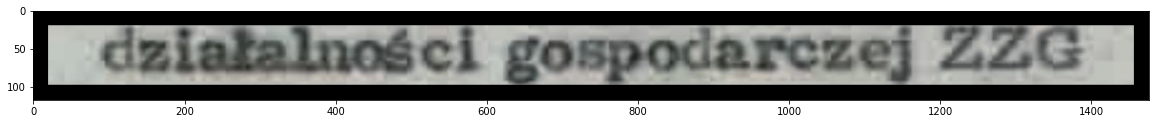

cropped number 10 z 348

mask number [E
GZ)

|

cropped text 10 z 348

mask text [E
GZ)

|



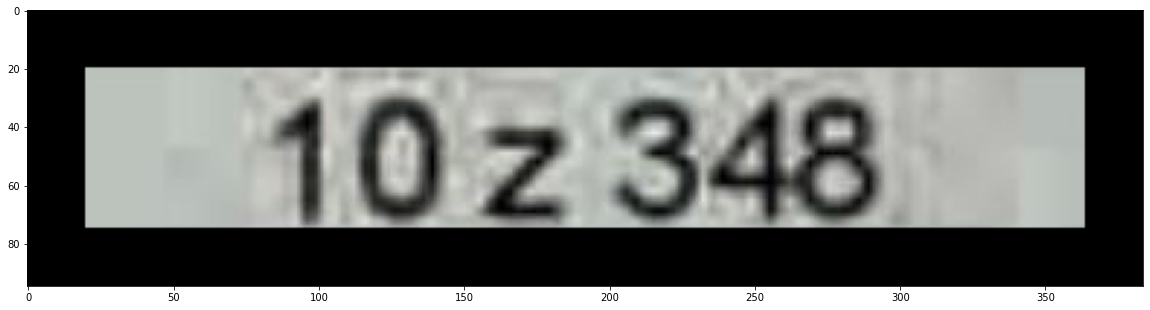

In [32]:
file='drive/MyDrive/kuba/resolution500/fig1.jpg'
gray=fig_prepare(file)
image = cv2.imread(file)
thresh=255-gray
# use morphology erode to blur horizontally
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

# use morphology open to remove thin lines from dotted lines
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# find contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# find the topmost box
ythresh = 1000
for c in cntrs:
      box = cv2.boundingRect(c)
      x,y,w,h = box
      if y < ythresh:
          topbox = box
          ythresh = y

  # Draw contours excluding the topmost box
result = gray.copy()
print(type(cntrs))
cntrs=cntrs[::-1]
i=0
for c in cntrs:
      box = cv2.boundingRect(c)
      if box != topbox:
        i=i+1
        if i>=0:
          x,y,w,h = box
          cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
          cropped = image[y:y + h, x:x + w]  

          kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
          dilated = cv2.dilate(cropped, kernel)
          eroded=cv2.erode(dilated,kernel)

          kernel_3x3 = np.ones((3, 3), np.float32) / 9

          kernel_sharpening = np.array([[-1,-1,-1], 
                                [-1, 9,-1],
                                [-1,-1,-1]])

          blurred = cv2.filter2D(eroded, -1, kernel_3x3)
          sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

          blurred = cv2.filter2D(sharpened, -1, kernel_3x3)
          sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

          lower=np.array([0,0,0])
          upper=np.array([130,130,130])

          mask = cv2.inRange(sharpened, lower, upper)

 

          cropped = cv2.copyMakeBorder( cropped, 20, 20, 20, 20, cv2.BORDER_CONSTANT)
          mask = cv2.copyMakeBorder( mask, 20, 20, 20, 20, cv2.BORDER_CONSTANT)
          
          if re.search('[a-zA-Z]',image_to_string(cropped,lang='pol',config = r'--oem 3 --psm 3')) or re.search('[a-zA-Z]',image_to_string(mask, lang='pol',config= r'--oem 3 --psm 3')):
              print('cropped number',image_to_string(cropped,lang='pol',config = r'--oem 3 --psm 3 outputbase digits'))
              print('mask number',image_to_string(mask, lang='pol',config = r'--oem 3 --psm 3 outputbase digits'))
              print('cropped text',image_to_string(cropped,lang='pol',config = r'--oem 3 --psm 3'))
              print('mask text',image_to_string(mask, lang='pol',config= r'--oem 3 --psm 3'))
              figure(figsize=(20,50))
              plt.imshow(cropped)
              plt.show() 





In [ ]:
def get_countour(img):
        try:
            output = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            output = output.copy()
        except Exception:
            output = img.copy()
        #imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #ret, thresh = cv2.threshold(output, 127, 255, 0)
        contours, hierarchy = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        c = max(contours, key = cv2.contourArea)
        if c:
          contours.remove(c)
        else:
          pass
        cv2.drawContours(output, contours, -1, (0,255,0),-1)


        kernel = np.ones((2,1),np.uint8)
       #eroded = cv2.erode(output, kernel,1)
        output = cv2.dilate(output, kernel,1)
        return output

def strengthen(img):
    try:
        imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except Exception:
        imgray = img
    #ret, thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    #blur1 = cv2.blur(imgray,(5,5))
    blur2 = cv2.GaussianBlur(imgray,(5,5),0)
    thresh2 = cv2.adaptiveThreshold(blur2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
    kernel = np.ones((2,1),np.uint8)
    #eroded = cv2.erode(thresh2, kernel,1)
    #opening = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel)
    #closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    return thresh2